In [1]:
!pip install seaborn==0.9.0 
!pip install matplotlib==1.4.3
!pip install duration

In [0]:
import pandas as pd
from duration import (
    to_seconds
)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(f"Seaborn {sns.__version__}, Pandas {pd.__version__}")

Seaborn 0.9.0, Pandas 0.22.0


In [0]:
dfs = pd.read_html('sprint.html')[0]

In [0]:
df = dfs.drop(columns=['Nome', 'Clube/ Equipe'])

In [6]:
df.head()

,Col,Num,Sx,Cat,Tempo Oficial:,Col.Cat
0,1.0,1478,M,VENC.M,00:11:42,1
1,2.0,1271,M,VENC.M,00:12:12,2
2,3.0,1151,M,VENC.M,00:12:18,3
3,4.0,1026,M,M40/44,00:13:30,1
4,5.0,1099,M,M30/34,00:13:33,1


In [0]:
time = df.head(1)['Tempo Oficial:'][0]
seconds = to_seconds(time, strict=False) # 91405

In [8]:
seconds, time

(702, '00:11:42')

In [9]:
df.shape

(590, 6)

In [10]:
52*60 + 12

3132

In [11]:
df['Tempo Oficial:'].head()

0    00:11:42
1    00:12:12
2    00:12:18
3    00:13:30
4    00:13:33
Name: Tempo Oficial:, dtype: object

In [0]:
df['TempoEmSegundos'] = df['Tempo Oficial:'].apply(to_seconds)
df['TempoEmSegundos'] = df['TempoEmSegundos'].round(2)

In [0]:
def to_minutes(seconds):
  minutes = seconds // 60
  seconds = (seconds - (60 * minutes)) 
  return minutes + (seconds / 100)
  

df['TempoEmMinutos'] = df['TempoEmSegundos'].apply(to_minutes)

In [0]:
df = df.drop(columns='Tempo Oficial:')

In [15]:
df.head()

,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
0,1.0,1478,M,VENC.M,1,702,11.42
1,2.0,1271,M,VENC.M,2,732,12.12
2,3.0,1151,M,VENC.M,3,738,12.18
3,4.0,1026,M,M40/44,1,810,13.30
4,5.0,1099,M,M30/34,1,813,13.33


In [16]:
df['TempoEmSegundos'].describe()

count     590.000000
mean     1542.354237
std       502.344640
min       702.000000
25%      1198.000000
50%      1453.000000
75%      1766.500000
max      4356.000000
Name: TempoEmSegundos, dtype: float64

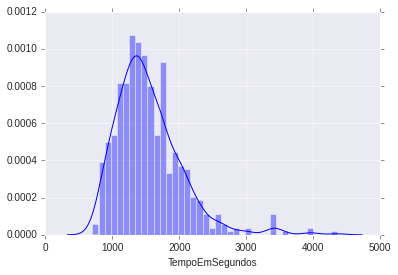

In [17]:
sns.set_style('darkgrid')
sns.distplot(df['TempoEmSegundos'], bins=40)

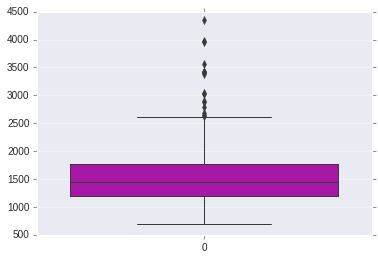

In [18]:
fig = sns.boxplot( palette=["m", "g"], data=df['TempoEmSegundos'])
fig

In [19]:
df['TempoEmSegundos'] > 3600

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
560    False
561    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
569    False
570    False
571    False
572    False
573    False
574    False
575    False
576    False
577    False
578    False
579    False
580    False
581    False
582    False
583    False
584    False
585    False
586    False
587     True
588     True
589     True
Name: TempoEmSegundos, Length: 590, dtype: bool

In [20]:
df.tail()

,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
585,586.0,1463,F,F35/39,37,3415,56.55
586,587.0,1267,F,F40/44,26,3563,59.23
587,588.0,1122,F,F65/69,5,3948,65.48
588,589.0,1034,M,M40/44,36,3973,66.13
589,590.0,1015,M,M40/44,37,4356,72.36


In [21]:
df.tail(20)

,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
570,571.0,1387,F,F65/69,4,2601,43.21
571,572.0,1706,F,F35/39,35,2610,43.30
572,573.0,1009,F,F45/49,20,2626,43.46
573,574.0,1672,M,M30/34,37,2638,43.58
574,575.0,1394,M,M40/44,35,2684,44.44
575,576.0,1412,M,M50/54,29,2792,46.32
576,577.0,1148,F,F55/59,23,2881,48.01
577,578.0,1604,F,F70+,5,2891,48.11
578,579.0,1299,M,M45/49,30,3026,50.26
579,580.0,1167,M,M25/29,23,3039,50.39


In [0]:
df_fem = df[df['Sx'] == 'F']
df_fem = df_fem.reset_index()

df_mas = df[df['Sx'] == 'M']
df_mas = df_mas.reset_index()

In [23]:
df_fem.tail()

,index,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
247,583,584.0,1300,F,F25/29,32,3413,56.53
248,584,585.0,1620,F,F55/59,24,3414,56.54
249,585,586.0,1463,F,F35/39,37,3415,56.55
250,586,587.0,1267,F,F40/44,26,3563,59.23
251,587,588.0,1122,F,F65/69,5,3948,65.48


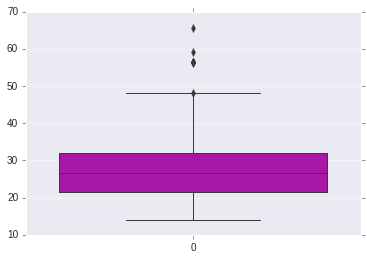

In [24]:
sns.boxplot(palette=["m", "g"], data=df_fem['TempoEmMinutos'])

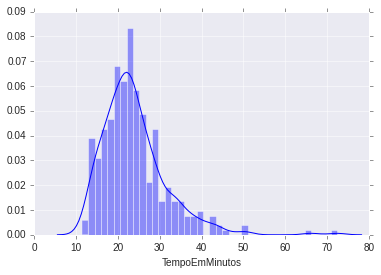

In [25]:
sns.set_style('darkgrid')
sns.distplot(df_mas['TempoEmMinutos'], bins=40)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


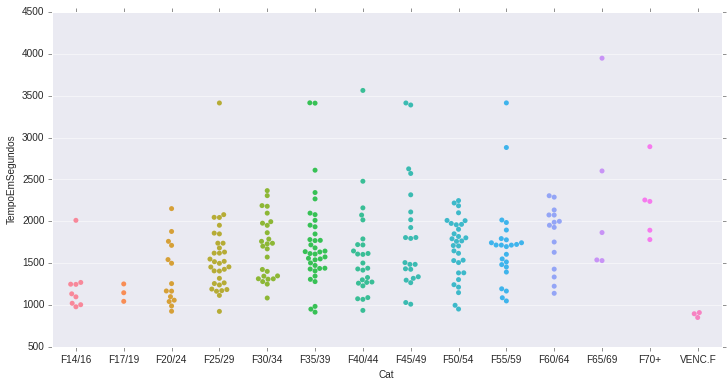

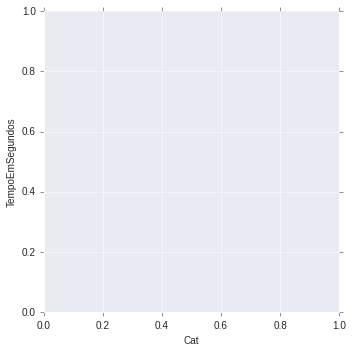

In [26]:
cats = sorted(list(df_fem['Cat'].unique()))
f, ax = plt.subplots(figsize=(12, 6))
plot = sns.catplot(x="Cat", y="TempoEmSegundos", kind="swarm", order=cats, data=df_fem, ax=ax)
plot

In [27]:
df_mas.head()

,index,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
0,0,1.0,1478,M,VENC.M,1,702,11.42
1,1,2.0,1271,M,VENC.M,2,732,12.12
2,2,3.0,1151,M,VENC.M,3,738,12.18
3,3,4.0,1026,M,M40/44,1,810,13.30
4,4,5.0,1099,M,M30/34,1,813,13.33


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


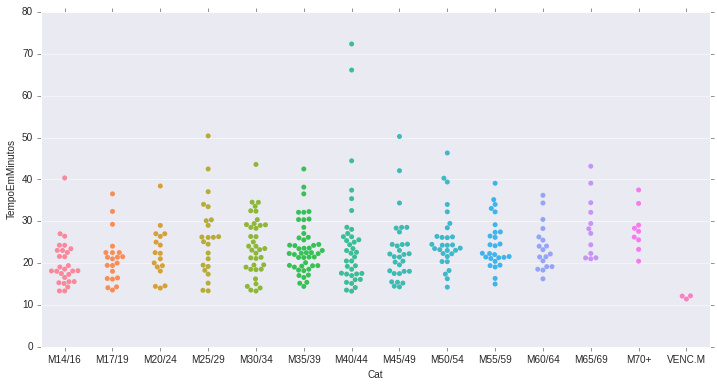

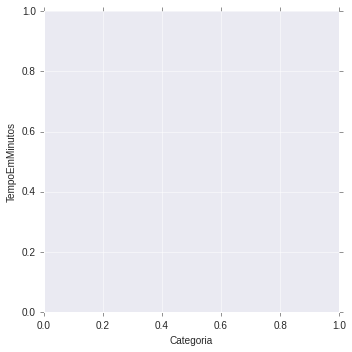

In [28]:
cats = sorted(list(df_mas['Cat'].unique()))

f, ax = plt.subplots(figsize=(12,6))
plot = sns.catplot(x="Cat", y="TempoEmMinutos", kind="swarm", order=cats, data=df_mas, ax=ax)
plot.set_xlabels("Categoria")
plot

In [0]:
df_mas['Categoria'] = df_mas['Cat'].apply(lambda s: s if s.startswith('V') else s[1:])
df_fem['Categoria'] = df_fem['Cat'].apply(lambda s: s if s.startswith('V') else s[1:])

In [30]:
challange_mas_grouped = df_mas.groupby(['Categoria']).agg({'TempoEmMinutos': ['size','mean']})
challange_fem_grouped = df_fem.groupby(['Categoria']).agg({'TempoEmMinutos': ['size','mean']})
challange_mas_grouped

TempoEmMinutos           
                    size       mean
Categoria                          
14/16                 28  20.032857
17/19                 21  21.093333
20/24                 17  22.510588
25/29                 23  26.142609
30/34                 37  24.245135
35/39                 47  23.748085
40/44                 37  25.042432
45/49                 30  23.136333
50/54                 29  25.573448
55/59                 27  24.681111
60/64                 18  23.855556
65/69                 12  28.650000
70+                    9  28.023333
VENC.M                 3  11.906667

In [0]:
challange_mas_grouped.rename(columns={'size':'Qtd(M)','mean':'Tempo media(M)'},inplace=True)
challange_fem_grouped.rename(columns={'size':'Qtd(F)','mean':'Tempo media(F)'},inplace=True)

df_new = pd.concat([challange_mas_grouped, challange_fem_grouped], axis=1)
df_new.columns = df_new.columns.droplevel(0)

df_new['Qtd(M)'] = df_new['Qtd(M)'].fillna(0.0).astype(int)
df_new['Qtd(F)'] = df_new['Qtd(F)'].fillna(0.0).astype(int)

df_new['Tempo media(M)'] = df_new['Tempo media(M)'].fillna(0.0).astype(int)
df_new['Tempo media(F)'] = df_new['Tempo media(F)'].fillna(0.0).astype(int)


In [0]:
total = 692
completaram = df.shape[0]
percent_compl = round(completaram / total * 100,2)

In [0]:
group_sx = df['Sx'].value_counts()
qtd_masc = group_sx[0]
qtd_fem = group_sx[1]
percent_masc = round(qtd_masc / total * 100,2)
percent_fem = round(qtd_fem / total * 100,2)

In [38]:
df['TempoEmMinutos'].mean().round(2)

25.5

In [39]:
df_tempo = df.groupby('Sx')['TempoEmMinutos'].mean().round(2)
tempo_media_masc = df_tempo[1]
tempo_media_fem  = df_tempo[0]
tempo_geral = df['TempoEmMinutos'].mean().round(2)

tempo_media_fem

27.59

In [40]:
print(f"Prova Sprint - 1.0 km - Copacabana - 22/12/2018")
print(f"Participantes: {total} / Completaram: {completaram} ({percent_compl}%)")
print(f"Qtd por sexo: {qtd_fem} ({percent_fem}%) (F) / {qtd_masc} ({percent_masc}%) (M)")
print(f"Tempo media (Minutos): {tempo_media_fem} (F) / {tempo_media_masc} (M), {tempo_geral} (Geral)")
print()
print("Por categoria, dividido entre homens (M) e mulheres (F)")
df_new

Prova Sprint - 1.0 km - Copacabana - 22/12/2018
Participantes: 692 / Completaram: 590 (85.26%)
Qtd por sexo: 252 (36.42%) (F) / 338 (48.84%) (M)
Tempo media (Minutos): 27.59 (F) / 23.94 (M), 25.5 (Geral)

Por categoria, dividido entre homens (M) e mulheres (F)


,Qtd(M),Tempo media(M),Qtd(F),Tempo media(F)
14/16,28,20,9,20
17/19,21,21,3,18
20/24,17,22,14,22
25/29,23,26,32,25
30/34,37,24,26,27
35/39,47,23,37,28
40/44,37,25,26,26
45/49,30,23,22,30
50/54,29,25,31,27
55/59,27,24,24,28
